# 단순선형회귀분석 예제

In [17]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터프레임의 출력 옵션 및 그래프 크기 설정
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = [8,5]

# 데이터 생성
np.random.seed(42)

# 30명의 환자에 대한 수축기 혈압 데이터 생성 평균 120mmHg, 표준편차 15mmHg
df = pd.DataFrame({
'SBP': np.random.normal(120, 15, 30)
})

# 이완기 혈압 = 0.7*수축기 혈압 + 랜덤 노이즈
df['DBP'] = -5.0 + 0.7*df['SBP'] + np.random.randint(-15, 15, 30)

# 데이터 확인
df.head()

,SBP,DBP
0,127.45,88.22
1,117.93,89.55
2,129.72,84.80
3,142.85,106.99
4,116.49,67.54


# 변수의 데이터 유형 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBP     30 non-null     float64
 1   DBP     30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
# 기술 통계량 확인
df.describe()

,SBP,DBP
count,30.00,30.00
mean,117.18,76.12
std,13.50,14.22
min,91.30,52.89
25%,111.13,66.91
50%,116.49,72.81
75%,125.41,87.59
max,143.69,108.58


# 산점도 분석

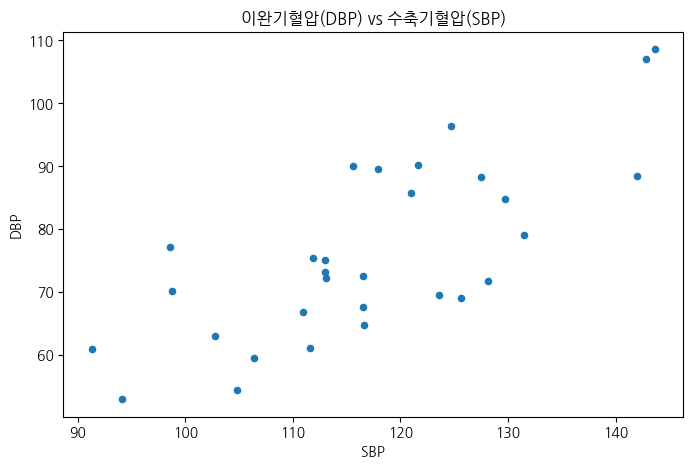

In [9]:
# 산점도 그래프
df.plot(
    kind='scatter',
    x='SBP',
    y='DBP',
    title='이완기혈압(DBP) vs 수축기혈압(SBP)'
);

# 상관분석

In [10]:
# 독립변수와 종속변수의 상관계수
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['DBP'], df['SBP'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: 0.751, p-값: 0.000
Pearson 상관계수는 통계적으로 유의함.


In [11]:
import statsmodels.formula.api as smf

# 회귀모형 생성
formula = 'DBP ~ SBP'

In [12]:
# OLS 클래스로 선형회귀모형의 객체를 생성
model = smf.ols(formula, data=df)

# fit 메서드로 모형 추정, 결과는 결과 객체에 저장
result = model.fit()

In [13]:
# 추정한 회귀선
print('-'*20, '1. 표본회귀선(모회귀선의 추정)', '-'*20)
print(f'절편은 {result.params["Intercept"]}이고, 기울기는 {result.params["SBP"]}')
print(f'따라서, 추정된 회귀선은 ')
print(f'DBP = {result.params["Intercept"]:.2f} + {result.params["SBP"]:.2f}*SBP')

# 회귀모형의 적합도 평가
print('-'*20, '2. 회귀모형의 적합도 평가', '-'*20)
print('결정계수 :', result.rsquared)

# 회귀계수의 유의성 검정(일반적으로 절편은 하지 않음)
print('-'*20, '3. 회귀계수의 유의성 검정', '-'*20)
print(f'SBP의 회귀계수의 p-값: {result.pvalues["SBP"]:.3f}')
if result.pvalues['SBP'] < 0.05:
    print('회귀계수는 통계적으로 유의함.')
else:
    print('회귀계수는 통계적으로 유의하지 않음.')

# 회귀모형의 유의성 검정
print('-'*20, '4. 회귀모형의 유의성 검정', '-'*20)
print(f'F-통계량: {result.fvalue:.2f}, p-값: {result.f_pvalue:.3f}')
if result.f_pvalue < 0.05:
    print('회귀모형은 통계적으로 유의함.')
else:
    print('회귀모형은 통계적으로 유의하지 않음.')



-------------------- 1. 표본회귀선(모회귀선의 추정) --------------------
절편은 -16.499809964665673이고, 기울기는 0.7904592019618322
따라서, 추정된 회귀선은 
DBP = -16.50 + 0.79*SBP
-------------------- 2. 회귀모형의 적합도 평가 --------------------
결정계수 : 0.5633721028347716
-------------------- 3. 회귀계수의 유의성 검정 --------------------
SBP의 회귀계수의 p-값: 0.000
회귀계수는 통계적으로 유의함.
-------------------- 4. 회귀모형의 유의성 검정 --------------------
F-통계량: 36.13, p-값: 0.000
회귀모형은 통계적으로 유의함.


In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DBP   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     36.13
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.78e-06
Time:                        07:44:33   Log-Likelihood:                -109.26
No. Observations:                  30   AIC:                             222.5
Df Residuals:                      28   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4998     15.509     -1.064      0.2

# 연습

단순선형회귀분석 예제

In [18]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터프레임의 출력 옵션 및 그래프 크기 설정
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = [8,5]

# 데이터 생성
np.random.seed(42)

# 30명에 대한 키,몸무게 데이터 생성
df = pd.DataFrame({
'Height': np.random.normal(165, 8, 30).round(1), # 키(cm), 평균 165, 표준편차 8
'Weight': np.random.normal(65, 12, 30).round(1), # 체중(kg), 평균 65, 표준편차 12
})
# BMI계산 = 체중을 키를 100으로 나눈 나머지에 제곱을함  
df['BMI'] = (df['Weight'] / ((df['Height']/100) ** 2))

# 데이터 확인
df.head()

,Height,Weight,BMI
0,169.00,57.80,20.24
1,163.90,87.20,32.46
2,170.20,64.80,22.37
3,177.20,52.30,16.66
4,163.10,74.90,28.16


 변수의 데이터 유형 확인

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  30 non-null     float64
 1   Weight  30 non-null     float64
 2   BMI     30 non-null     float64
dtypes: float64(3)
memory usage: 852.0 bytes


In [20]:
# 기술 통계량 확인
df.describe()

,Height,Weight,BMI
count,30.00,30.00,30.00
mean,163.49,63.55,23.87
std,7.20,11.17,4.45
min,149.70,41.50,14.18
25%,160.27,56.52,20.93
50%,163.10,64.20,22.75
75%,167.88,71.50,27.69
max,177.60,87.20,32.46


산점도 분석

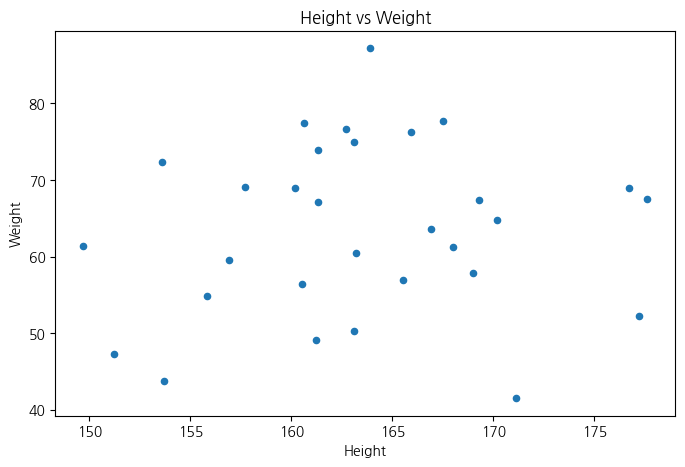

In [22]:
# 산점도 그래프
df.plot(
    kind='scatter',
    x='Height',
    y='Weight',
    title='Height vs Weight'
);

상관분석

In [23]:
# 독립변수와 종속변수의 상관계수
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['Height'], df['Weight'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: 0.099, p-값: 0.602
Pearson 상관계수는 통계적으로 유의하지 않음.


In [26]:
import statsmodels.formula.api as smf

# 회귀모형 생성
formula = 'Height ~ Weight'

In [27]:
# OLS 클래스로 선형회귀모형의 객체를 생성
model = smf.ols(formula, data=df)

# fit 메서드로 모형 추정, 결과는 결과 객체에 저장
result = model.fit()

In [29]:
# 추정한 회귀선
print('-'*20, '1. 표본회귀선(모회귀선의 추정)', '-'*20)
print(f'절편은 {result.params["Intercept"]}이고, 기울기는 {result.params["Weight"]}')
print(f'따라서, 추정된 회귀선은 ')
print(f'Height = {result.params["Intercept"]:.2f} + {result.params["Weight"]:.2f}*Weight')

# 회귀모형의 적합도 평가
print('-'*20, '2. 회귀모형의 적합도 평가', '-'*20)
print('결정계수 :', result.rsquared)

# 회귀계수의 유의성 검정(일반적으로 절편은 하지 않음)
print('-'*20, '3. 회귀계수의 유의성 검정', '-'*20)
print(f'SBWeight의 회귀계수의 p-값: {result.pvalues["Weight"]:.3f}')
if result.pvalues['Weight'] < 0.05:
    print('회귀계수는 통계적으로 유의함.')
else:
    print('회귀계수는 통계적으로 유의하지 않음.')

# 회귀모형의 유의성 검정
print('-'*20, '4. 회귀모형의 유의성 검정', '-'*20)
print(f'F-통계량: {result.fvalue:.2f}, p-값: {result.f_pvalue:.3f}')
if result.f_pvalue < 0.05:
    print('회귀모형은 통계적으로 유의함.')
else:
    print('회귀모형은 통계적으로 유의하지 않음.')



-------------------- 1. 표본회귀선(모회귀선의 추정) --------------------
절편은 159.42162072645152이고, 기울기는 0.0639627495051156
따라서, 추정된 회귀선은 
Height = 159.42 + 0.06*Weight
-------------------- 2. 회귀모형의 적합도 평가 --------------------
결정계수 : 0.00986584331005369
-------------------- 3. 회귀계수의 유의성 검정 --------------------
SBWeight의 회귀계수의 p-값: 0.602
회귀계수는 통계적으로 유의하지 않음.
-------------------- 4. 회귀모형의 유의성 검정 --------------------
F-통계량: 0.28, p-값: 0.602
회귀모형은 통계적으로 유의하지 않음.


In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2790
Date:                Tue, 01 Jul 2025   Prob (F-statistic):              0.602
Time:                        08:12:40   Log-Likelihood:                -101.12
No. Observations:                  30   AIC:                             206.2
Df Residuals:                      28   BIC:                             209.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.4216      7.810     20.412      0.0